***
# HEICODERS ACADEMY
<b>AI300: Deploying Machine Learning Systems to the Cloud</b><br>
***
<b>DeepNote Capstone Project T09</b>
***

<b>Last Updated: 11 June 2024</b> <br><br>

# 1.📝Data Preparation
---

> **OVERALL GOAL:** 
> - Ingest the data and relabel the outcome variable

In [1]:
#study the database in mySQL first to understand the database
#install sql alchemy to retreive data from Data Base Server

#!pip install sqlalchemy

In [2]:
#query the database from remote server

query = """SELECT * FROM account;"""
query_two = """SELECT * FROM account_usage;"""
query_three = """SELECT * FROM churn_status         """
query_four = """SELECT * FROM city"""
query_five = """SELECT * FROM customer"""

In [3]:
#creditial and log in details

import pandas as pd
from sqlalchemy import create_engine

ENDPOINT = 'heicoders-playground.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT = 3306
USERNAME = 'student300'
PASSWORD = 'heicoders_AI300'
DBNAME = 'ai300_capstone'

database_conn = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DBNAME}')


In [4]:
#put the data base into dataframe

df = pd.read_sql(query, database_conn)
df_two = pd.read_sql(query_two, database_conn)
df_three = pd.read_sql(query_three, database_conn)
df_four = pd.read_sql(query_four, database_conn)
df_five = pd.read_sql(query_five, database_conn)

In [5]:
#merge the dataframes as one dataframe - now we merge df and df_two together, merge on common column account_id

df_merged = pd.merge(df, df_two,  on='account_id', how = "outer")

In [6]:
df_merged.head(3)

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,...,Credit Card,35.38,1945.90,13,No,No,No,66.05,3462.10,44.53
1,AAKY-HUGJV,6235-VDHOM,5,0,Yes,DSL,Yes,No,No,No,...,Bank Withdrawal,0.00,0.00,26,No,No,No,28.45,131.05,0.00
2,AAMB-TJYWC,4006-HKYHO,63,0,Yes,DSL,Yes,Yes,No,Yes,...,Bank Withdrawal,29.58,1863.54,47,Yes,Yes,Yes,86.70,5309.50,0.00


In [7]:
#merge the dataframes as one dataframe - now we merge df_merged and df_three together, merge on common column account_id

df_merged = pd.merge(df_merged, df_three,  on='customer_id', how = "outer")

In [8]:
df_merged.head(3)

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,status,churn_label,churn_category,churn_reason
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,...,No,No,No,66.05,3462.10,44.53,Stayed,No,,
1,AAKY-HUGJV,6235-VDHOM,5,0,Yes,DSL,Yes,No,No,No,...,No,No,No,28.45,131.05,0.00,Churned,Yes,Dissatisfaction,Limited range of services
2,AAMB-TJYWC,4006-HKYHO,63,0,Yes,DSL,Yes,Yes,No,Yes,...,Yes,Yes,Yes,86.70,5309.50,0.00,Stayed,No,,


In [9]:
#seems like data base "city" does not have a common merge column, to merge later once df_five is merged
df_four

,area_id,zip_code,city,latitutde,longitude,population
0,1,90001,Los Angeles,33.973616,-118.249020,54492
1,2,90002,Los Angeles,33.949255,-118.246978,44586
2,3,90003,Los Angeles,33.964131,-118.272783,58198
3,4,90004,Los Angeles,34.076259,-118.310715,67852
4,5,90005,Los Angeles,34.059281,-118.307420,43019
...,...,...,...,...,...,...
1621,1622,96143,Kings Beach,39.246654,-120.029273,4806
1622,1623,96145,Tahoe City,39.178337,-120.162806,4002
1623,1624,96146,Olympic Valley,39.191797,-120.212401,942
1624,1625,96148,Tahoe Vista,39.241240,-120.054765,678


In [10]:
#merge the dataframes as one dataframe - now we merge df and df_five together, merge on common column account_id

df_merged = pd.merge(df_merged, df_five,  on='customer_id', how = "outer")

In [11]:
df_merged

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,status,churn_label,churn_category,churn_reason,gender,age,senior_citizen,married,num_dependents,zip_code
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,...,Stayed,No,,,Female,41,No,Yes,0,92123
1,AAKY-HUGJV,6235-VDHOM,5,0,Yes,DSL,Yes,No,No,No,...,Churned,Yes,Dissatisfaction,Limited range of services,Female,77,Yes,No,0,92509
2,AAMB-TJYWC,4006-HKYHO,63,0,Yes,DSL,Yes,Yes,No,Yes,...,Stayed,No,,,Male,24,No,No,0,93311
3,AANL-MWPZF,3258-SYSWS,72,0,Yes,Fiber Optic,Yes,Yes,Yes,Yes,...,Stayed,No,,,Male,75,Yes,No,0,92040
4,AAOS-KANBS,5360-XGYAZ,72,1,Yes,DSL,No,No,No,Yes,...,Stayed,No,,,Male,32,No,Yes,1,90040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,ZZHC-VLZUC,1169-SAOCL,49,0,Yes,Fiber Optic,No,Yes,Yes,Yes,...,Stayed,No,,,Male,45,No,No,0,95007
7039,ZZKH-HTGCT,7115-IRDHS,72,3,No,None,No,Yes,Yes,No,...,Stayed,No,,,Female,64,No,Yes,0,95370
7040,ZZPL-VSYXD,5119-KEPFY,36,3,Yes,Fiber Optic,Yes,Yes,Yes,No,...,Stayed,No,,,Male,50,No,Yes,0,95131
7041,ZZUR-SCFQL,3926-CUQZX,1,0,Yes,DSL,Yes,Yes,No,No,...,Churned,Yes,Other,Don't know,Male,27,No,No,0,91906


In [12]:
#now to merge df_four on zip_code

df_merged = pd.merge(df_merged, df_four,  on='zip_code', how = "outer")

In [13]:
df_merged

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,...,41,No,Yes,0,92123,371,San Diego,32.808814,-117.134694,25232
1,IJNZ-VKUJF,2364-UFROM,30,0,Yes,Cable,Yes,Yes,No,Yes,...,47,No,No,0,92123,371,San Diego,32.808814,-117.134694,25232
2,JEDA-DVLVN,8272-ONJLV,12,0,Yes,Fiber Optic,Yes,Yes,No,No,...,57,No,No,0,92123,371,San Diego,32.808814,-117.134694,25232
3,LLTM-YHWNT,0786-VSSUD,16,0,Yes,DSL,Yes,No,No,No,...,68,Yes,No,0,92123,371,San Diego,32.808814,-117.134694,25232
4,OQMR-HHTMW,6122-EFVKN,24,0,Yes,Cable,Yes,No,No,Yes,...,44,No,No,0,92123,371,San Diego,32.808814,-117.134694,25232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,UWPG-PIEBZ,3635-JBPSG,15,0,Yes,DSL,Yes,No,No,No,...,49,No,No,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7039,VXSN-IFZJV,6341-JVQGF,31,2,Yes,DSL,Yes,Yes,No,Yes,...,26,No,Yes,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7040,WYMB-PGFXX,1703-MGIAB,17,0,Yes,DSL,Yes,Yes,Yes,Yes,...,53,No,No,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7041,XWFU-AXYES,3823-KYNQY,12,0,No,None,No,Yes,Yes,No,...,61,No,No,0,91406,225,Van Nuys,34.195685,-118.490752,50047


In [14]:
#commencement of data cleaning

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_id                     7043 non-null   object 
 1   customer_id                    7043 non-null   object 
 2   tenure_months                  7043 non-null   int64  
 3   num_referrals                  7043 non-null   int64  
 4   has_internet_service           7043 non-null   object 
 5   internet_type                  7043 non-null   object 
 6   has_unlimited_data             7043 non-null   object 
 7   has_phone_service              7043 non-null   object 
 8   has_multiple_lines             7043 non-null   object 
 9   has_premium_tech_support       7043 non-null   object 
 10  has_online_security            7043 non-null   object 
 11  has_online_backup              7043 non-null   object 
 12  has_device_protection          7043 non-null   o

# 2.🔍Exploratory Data Analysis
---

> **OVERALL GOAL:** 
> - Get an understanding for which variables are important, view summary statistics, and visualize the data

In [15]:
df_merged.fillna(0)

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,...,41,No,Yes,0,92123,371,San Diego,32.808814,-117.134694,25232
1,IJNZ-VKUJF,2364-UFROM,30,0,Yes,Cable,Yes,Yes,No,Yes,...,47,No,No,0,92123,371,San Diego,32.808814,-117.134694,25232
2,JEDA-DVLVN,8272-ONJLV,12,0,Yes,Fiber Optic,Yes,Yes,No,No,...,57,No,No,0,92123,371,San Diego,32.808814,-117.134694,25232
3,LLTM-YHWNT,0786-VSSUD,16,0,Yes,DSL,Yes,No,No,No,...,68,Yes,No,0,92123,371,San Diego,32.808814,-117.134694,25232
4,OQMR-HHTMW,6122-EFVKN,24,0,Yes,Cable,Yes,No,No,Yes,...,44,No,No,0,92123,371,San Diego,32.808814,-117.134694,25232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,UWPG-PIEBZ,3635-JBPSG,15,0,Yes,DSL,Yes,No,No,No,...,49,No,No,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7039,VXSN-IFZJV,6341-JVQGF,31,2,Yes,DSL,Yes,Yes,No,Yes,...,26,No,Yes,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7040,WYMB-PGFXX,1703-MGIAB,17,0,Yes,DSL,Yes,Yes,Yes,Yes,...,53,No,No,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7041,XWFU-AXYES,3823-KYNQY,12,0,No,None,No,Yes,Yes,No,...,61,No,No,0,91406,225,Van Nuys,34.195685,-118.490752,50047


In [16]:
#relabel df_merged as train_df

train_df = df_merged 


In [17]:
#get a sensing of target outcome

train_df['churn_label'].value_counts()

No     5174
Yes    1817
         52
Name: churn_label, dtype: int64

In [18]:
#relabel churn label YES as 1, churn label No as 0 and all else as 0

def revised_churn_label (churn_label):
    if churn_label in ["Yes" ]:
        return 1
    
    else:
        return 0
    

In [19]:
#update the target column churn label to 0 or 1
train_df['churn_label'] = train_df['churn_label'].apply(revised_churn_label)

In [20]:
#check for the outcome
train_df['churn_label'].value_counts()

0    5226
1    1817
Name: churn_label, dtype: int64

In [21]:
#it appears that the dataframe has a lot of yes and no, so we replace them with 1 and 0 for ML

train_df = train_df.replace(["Yes" , "No"], ["0" , "1"])

train_df.head(5)

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
0,AAJU-HMJLK,0334-ZFJSR,55,0,0,Cable,1,0,0,0,...,41,1,0,0,92123,371,San Diego,32.808814,-117.134694,25232
1,IJNZ-VKUJF,2364-UFROM,30,0,0,Cable,0,0,1,0,...,47,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
2,JEDA-DVLVN,8272-ONJLV,12,0,0,Fiber Optic,0,0,1,1,...,57,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
3,LLTM-YHWNT,0786-VSSUD,16,0,0,DSL,0,1,1,1,...,68,0,1,0,92123,371,San Diego,32.808814,-117.134694,25232
4,OQMR-HHTMW,6122-EFVKN,24,0,0,Cable,0,1,1,0,...,44,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232


In [22]:
#check customer_id to see if the numbers can be retained for ML

train_df["customer_id"].unique

<bound method Series.unique of 0       0334-ZFJSR
1       2364-UFROM
2       8272-ONJLV
3       0786-VSSUD
4       6122-EFVKN
           ...    
7038    3635-JBPSG
7039    6341-JVQGF
7040    1703-MGIAB
7041    3823-KYNQY
7042    0463-WZZKO
Name: customer_id, Length: 7043, dtype: object>

In [23]:
#extract only the numbers from the customer_id columns, remove the text
train_df["customer_id"] = train_df.customer_id.str.extract('(\d+)')
train_df

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
0,AAJU-HMJLK,0334,55,0,0,Cable,1,0,0,0,...,41,1,0,0,92123,371,San Diego,32.808814,-117.134694,25232
1,IJNZ-VKUJF,2364,30,0,0,Cable,0,0,1,0,...,47,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
2,JEDA-DVLVN,8272,12,0,0,Fiber Optic,0,0,1,1,...,57,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
3,LLTM-YHWNT,0786,16,0,0,DSL,0,1,1,1,...,68,0,1,0,92123,371,San Diego,32.808814,-117.134694,25232
4,OQMR-HHTMW,6122,24,0,0,Cable,0,1,1,0,...,44,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,UWPG-PIEBZ,3635,15,0,0,DSL,0,1,1,1,...,49,1,1,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7039,VXSN-IFZJV,6341,31,2,0,DSL,0,0,1,0,...,26,1,0,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7040,WYMB-PGFXX,1703,17,0,0,DSL,0,0,0,0,...,53,1,1,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7041,XWFU-AXYES,3823,12,0,1,None,1,0,0,1,...,61,1,1,0,91406,225,Van Nuys,34.195685,-118.490752,50047


In [24]:
train_df

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
0,AAJU-HMJLK,0334,55,0,0,Cable,1,0,0,0,...,41,1,0,0,92123,371,San Diego,32.808814,-117.134694,25232
1,IJNZ-VKUJF,2364,30,0,0,Cable,0,0,1,0,...,47,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
2,JEDA-DVLVN,8272,12,0,0,Fiber Optic,0,0,1,1,...,57,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
3,LLTM-YHWNT,0786,16,0,0,DSL,0,1,1,1,...,68,0,1,0,92123,371,San Diego,32.808814,-117.134694,25232
4,OQMR-HHTMW,6122,24,0,0,Cable,0,1,1,0,...,44,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,UWPG-PIEBZ,3635,15,0,0,DSL,0,1,1,1,...,49,1,1,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7039,VXSN-IFZJV,6341,31,2,0,DSL,0,0,1,0,...,26,1,0,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7040,WYMB-PGFXX,1703,17,0,0,DSL,0,0,0,0,...,53,1,1,0,91406,225,Van Nuys,34.195685,-118.490752,50047
7041,XWFU-AXYES,3823,12,0,1,None,1,0,0,1,...,61,1,1,0,91406,225,Van Nuys,34.195685,-118.490752,50047


In [25]:
#check columns for categorical data
train_df.columns

Index(['account_id', 'customer_id', 'tenure_months', 'num_referrals',
       'has_internet_service', 'internet_type', 'has_unlimited_data',
       'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support',
       'has_online_security', 'has_online_backup', 'has_device_protection',
       'contract_type', 'paperless_billing', 'payment_method',
       'avg_long_distance_fee_monthly', 'total_long_distance_fee',
       'avg_gb_download_monthly', 'stream_tv', 'stream_movie', 'stream_music',
       'total_monthly_fee', 'total_charges_quarter', 'total_refunds', 'status',
       'churn_label', 'churn_category', 'churn_reason', 'gender', 'age',
       'senior_citizen', 'married', 'num_dependents', 'zip_code', 'area_id',
       'city', 'latitutde', 'longitude', 'population'],
      dtype='object')

In [26]:
#check data labels for internet_type
train_df["internet_type"].value_counts()

#will keep this for one-hot coding feature later

Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: internet_type, dtype: int64

In [27]:
#check data labels for contract_type
train_df["contract_type"].value_counts()

#will keep this for one-hot coding feature later

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: contract_type, dtype: int64

In [28]:
#check data labels for payment_method
train_df["payment_method"].value_counts()

#will keep this for one-hot coding feature later

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: payment_method, dtype: int64

In [29]:
#check data labels for status
train_df["status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: status, dtype: int64

In [30]:
#looking at labels and churn label from earlier, seems to have some relationship
#assign 1 to churned and all else 0 to stayed or joined

def revised_status (status):
    if status in ["Churned" ]:
        return 1
    
    else:
        return 0
    
train_df['status'] = train_df['status'].apply(revised_status)

train_df["status"].value_counts()

0    5174
1    1869
Name: status, dtype: int64

In [31]:
#check data labels for churn_category
train_df["churn_category"].value_counts()

#will keep this for one-hot coding feature later

                   5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: churn_category, dtype: int64

In [32]:
#check data labels for churn_reason

train_df["churn_reason"].value_counts()

#will transpose as label encoding as feature

                                             5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support                12


In [33]:
#check data labels for city

train_df["city"].value_counts()


Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Holtville             2
Jacumba               2
Eldridge              2
Name: city, Length: 1106, dtype: int64

In [34]:
#using graphs to determine which city has the most subscribers

import plotly.express as px
df_city = train_df
fig = px.histogram(df_city, x="city").update_xaxes(categoryorder = "total descending")
fig.show()

#will transpose as label encoding as feature as there are too many combinations and LA seems to be the highest area

In [35]:
#drop account_id column since we can use customer_id

train_df = train_df.drop("account_id" , axis = 1)

train_df.head(3)

,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,...,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
0,0334,55,0,0,Cable,1,0,0,0,0,...,41,1,0,0,92123,371,San Diego,32.808814,-117.134694,25232
1,2364,30,0,0,Cable,0,0,1,0,0,...,47,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232
2,8272,12,0,0,Fiber Optic,0,0,1,1,1,...,57,1,1,0,92123,371,San Diego,32.808814,-117.134694,25232


In [36]:
#Performing EDA and feature Engineering

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
num_referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
avg_long_distance_fee_monthly,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
total_long_distance_fee,7043.0,749.099262,846.660055,0.000000,70.545000,401.440000,1191.100000,3564.720000
avg_gb_download_monthly,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000
total_monthly_fee,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
total_charges_quarter,7043.0,2280.381264,2266.220462,18.800000,400.150000,1394.550000,3786.600000,8684.800000
total_refunds,7043.0,1.962182,7.902614,0.000000,0.000000,0.000000,0.000000,49.790000
status,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
churn_label,7043.0,0.257987,0.437558,0.000000,0.000000,0.000000,1.000000,1.000000


In [37]:
# Import label encoder for all categorical data
from sklearn.preprocessing import LabelEncoder

train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.sample(3)

,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,...,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
2027,3401,0,0,0,1,0,0,1,1,1,...,17,1,1,0,698,698,869,673,726,1022
3198,2065,35,3,0,1,0,0,1,1,0,...,13,1,0,2,761,761,802,691,1337,39
5369,1462,0,1,0,1,0,0,1,1,1,...,29,1,0,2,499,499,415,174,1507,989


In [38]:
#check for correlationship with churn_label

train_df.corr().iloc[-14:40, :].T

,churn_label,churn_category,churn_reason,gender,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
customer_id,-0.014762,-0.014522,-0.006268,0.006160,0.005909,0.002097,0.026728,-0.008261,-0.013106,-0.013106,0.007215,-0.012192,0.012841,0.031807
tenure_months,-0.346104,-0.302462,-0.248305,0.005162,0.009927,-0.016299,-0.380394,0.108237,0.009873,0.009873,0.017034,0.010802,-0.010912,-0.018088
num_referrals,-0.281863,-0.249677,-0.203191,-0.009074,-0.025141,0.026575,-0.672867,0.278003,0.008753,0.008753,-0.004052,0.018023,-0.010499,-0.021617
has_internet_service,-0.223464,-0.193192,-0.164549,0.006026,-0.117346,0.182742,-0.000615,0.153137,0.019100,0.019100,-0.007082,0.034444,-0.039833,-0.013656
internet_type,-0.049822,-0.041437,-0.036663,0.003217,0.000809,0.014306,0.001627,0.059232,0.007313,0.007313,0.003984,0.011500,-0.025563,-0.005578
has_unlimited_data,-0.161862,-0.142164,-0.117228,0.000648,-0.084353,0.140179,0.018792,0.113853,0.013520,0.013520,-0.004936,0.025972,-0.031151,-0.005175
has_phone_service,-0.010915,-0.011539,-0.001966,0.006488,-0.009965,0.008576,0.017706,0.010149,0.010172,0.010172,-0.003340,0.021216,-0.019056,-0.007819
has_multiple_lines,-0.041741,-0.044249,-0.040206,0.008414,-0.103122,0.142948,0.142057,0.030307,0.022818,0.022818,-0.009910,0.029522,-0.026846,-0.001869
has_premium_tech_support,0.163255,0.136973,0.113276,0.009212,0.043760,-0.060625,0.119999,-0.022094,-0.016550,-0.016550,0.013979,-0.015269,0.012559,0.009589
has_online_security,0.168554,0.144332,0.115964,0.017021,0.038001,-0.038653,0.143106,-0.041977,-0.009082,-0.009082,-0.009040,-0.013702,0.013697,-0.000785


In [39]:
#due to iteritem issue in Pandas use the following below:

pd.DataFrame.iteritems = pd.DataFrame.items

df_churn = train_df

fig = px.scatter_matrix(df_churn, dimensions=["status", "churn_category", "churn_reason", "churn_label"])
fig.show()

In [40]:
#based on the corr above which are either zero or 1 with respect to churn_label
#remove 'status', churn_category', 'churn_reason', since they are depended on churn_label which could cause data leaking and such 
#data may not be obtainable in the prediction production outpu as well. 

In [41]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

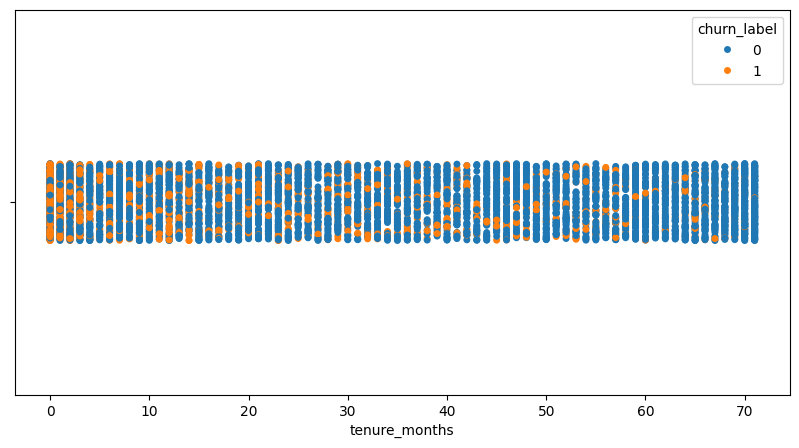

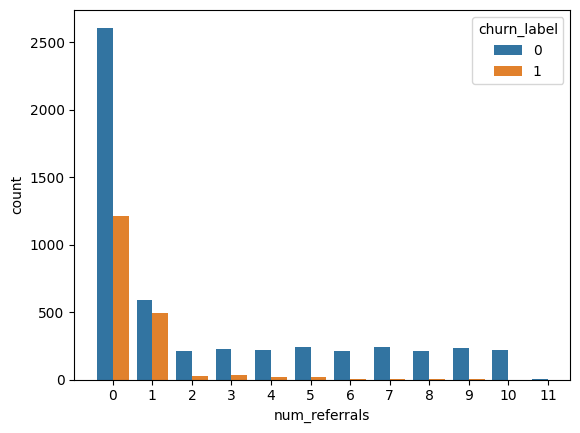

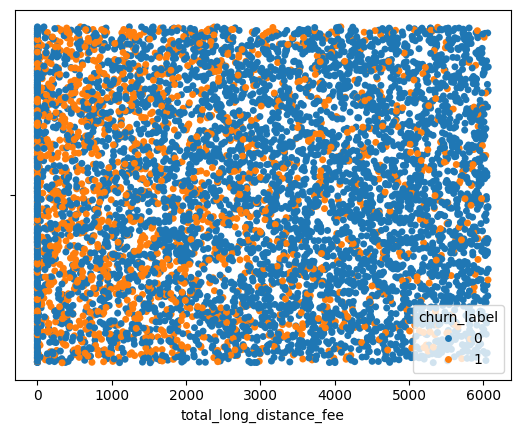

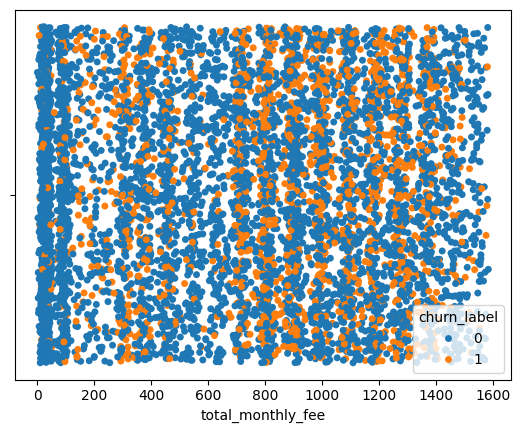

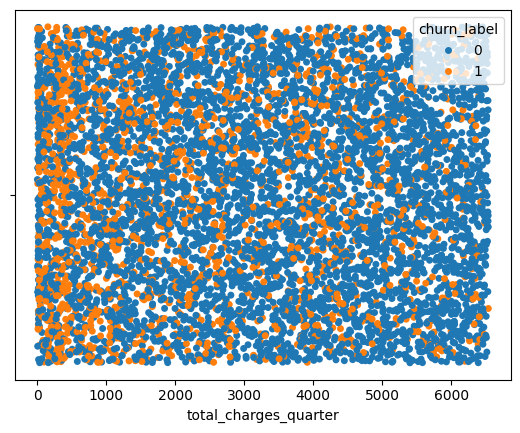

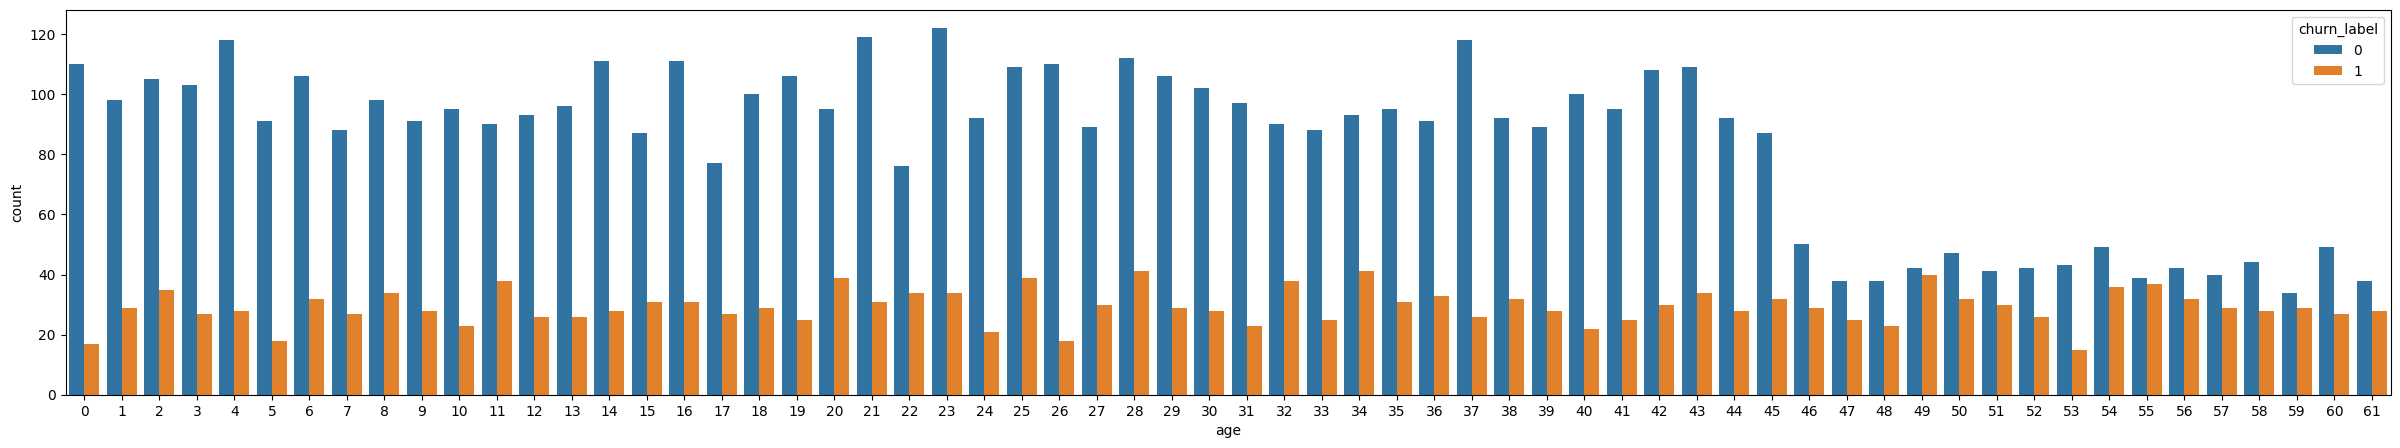

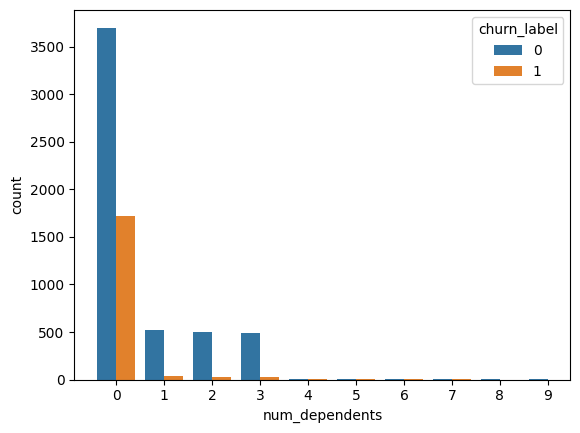

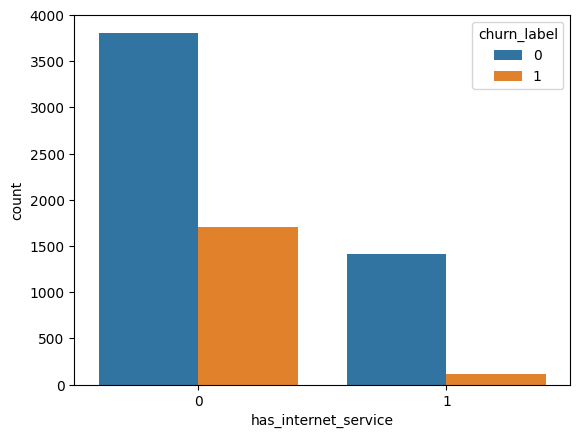

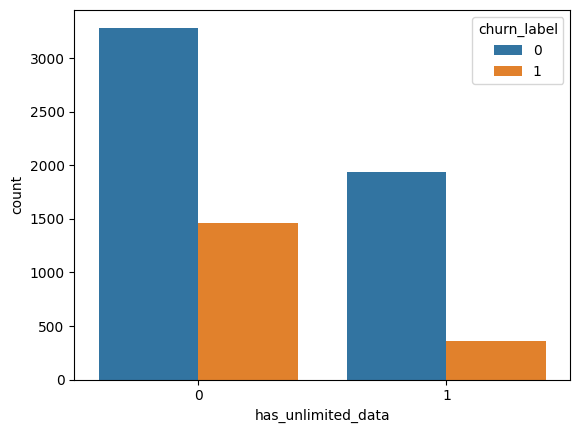

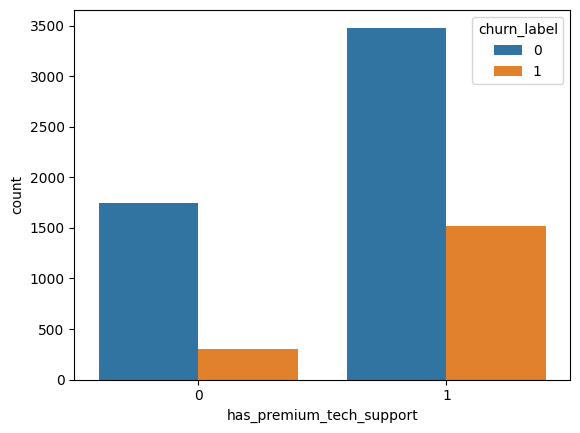

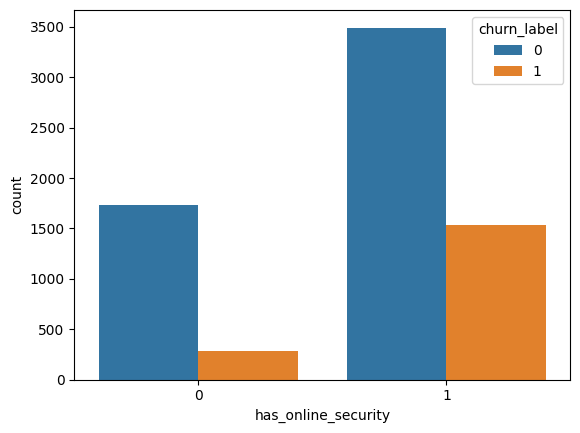

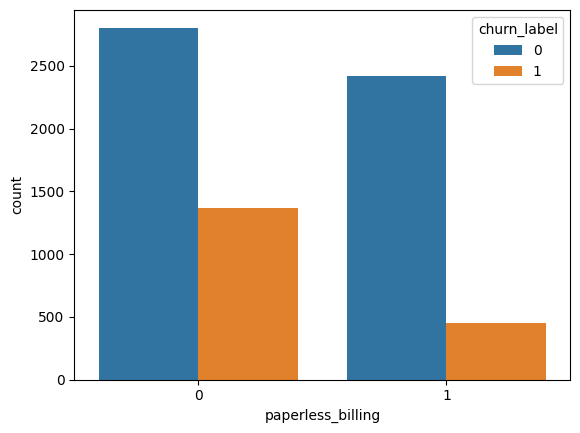

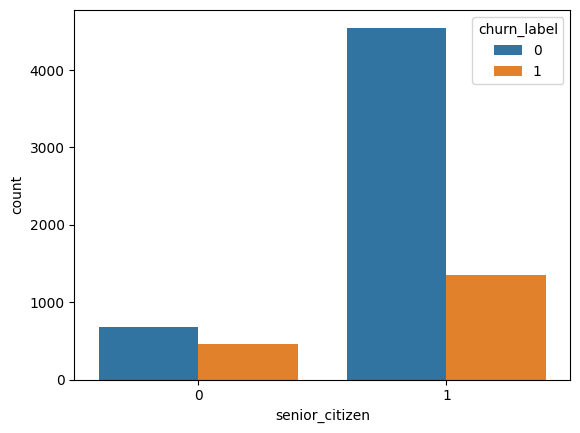

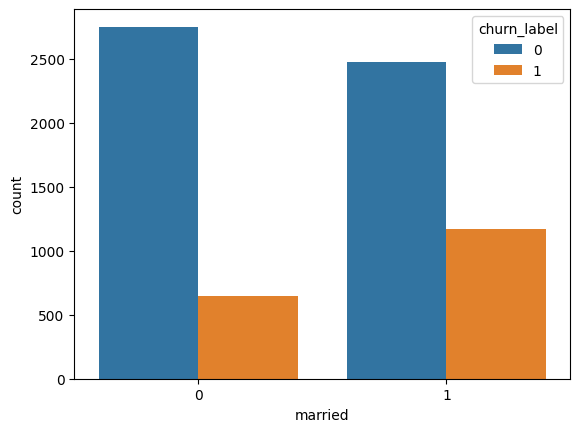

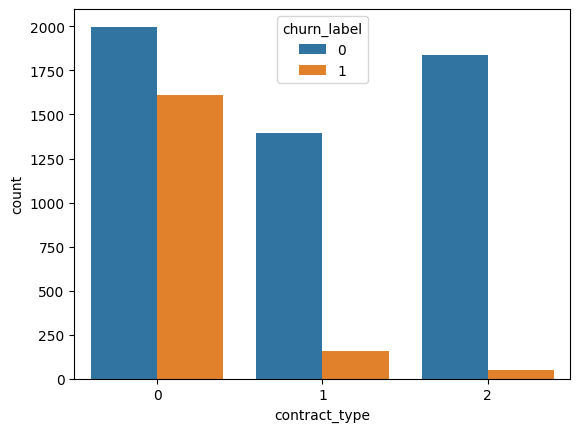

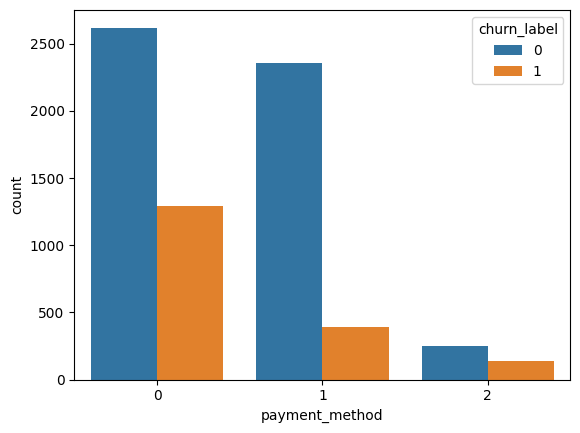

In [42]:
#Visualise columns in dataset with seaborn

#Those within 1 year (<12 Tenure Months) are very likely to churn and switch telco (maybe lock-in 1 year at most?)
#Tenure months less than 0 should be dropped as as almost 100% churn rate, maybe some on trial period
#Tenure months more than 70 is guaranteed to stay, can also drop
plt.figure(figsize=(10,5))
sns.stripplot(data=train_df, x="tenure_months", hue="churn_label")
plt.show()

#People who do more number of referrals (>2) are likely to stay
#Those with 11 referrals can be dropped off as outlier
sns.countplot(data=train_df, x="num_referrals", hue="churn_label")
plt.autoscale(enable=True, axis='both')
plt.show()

#Lower long distance fee (<500) is likely to churn (maybe can pair with zip_code for more interpretation and usefulness)
sns.stripplot(data=train_df, x="total_long_distance_fee", hue="churn_label")
plt.autoscale(enable=True, axis='both')
plt.show()

#Higher total monthly fee fee (>70) is likely to churn
#total_monthly_fee <= 30 can be dropped off as outlier since it all points to no churn (too cheap?)
sns.stripplot(data=train_df, x="total_monthly_fee", hue="churn_label")
plt.autoscale(enable=True, axis='both')
plt.show()

#Not much useful interpretation for total_charges_quarter
sns.stripplot(data=train_df, x="total_charges_quarter", hue="churn_label")
plt.autoscale(enable=True, axis='both')
plt.show()

#below age of 65 seems to have more percentage of people not churning (senior citizen plan?)
plt.figure(figsize=(30,5))
sns.countplot(data=train_df, x="age", hue="churn_label")
plt.show()

#num of dependents 0 are likely to churn (strong indicator)
#num_dependents > 3 can be dropped off as outlier
sns.countplot(data=train_df, x="num_dependents", hue="churn_label")
plt.autoscale(enable=True, axis='both')
plt.show()

#those with no internet service less likely to churn
sns.countplot(data=train_df, x="has_internet_service", hue="churn_label")
plt.show()

#those with no unlimited data less likely to churn
sns.countplot(data=train_df, x="has_unlimited_data", hue="churn_label")
plt.show()

#those with no premium support more likely to churn
sns.countplot(data=train_df, x="has_premium_tech_support", hue="churn_label")
plt.show()

#those with no online security more likely to churn
sns.countplot(data=train_df, x="has_online_security", hue="churn_label")
plt.show()

#those with no paperless_billing less likely to churn
sns.countplot(data=train_df, x="paperless_billing", hue="churn_label")
plt.show()

#senior_citizen more likely to churn
sns.countplot(data=train_df, x="senior_citizen", hue="churn_label")
plt.show()

#non-married more likely to churn
sns.countplot(data=train_df, x="married", hue="churn_label")
plt.show()

#Month-to-Month has highest churn rate,
#however, one year and two year not much difference
# 0 - Month-to-Month, 1 - One-year, 2 - Two-year
sns.countplot(data=train_df, x="contract_type", hue="churn_label")
plt.show()

#Mailed Check has highest churn rate, followed by Bank_Withdrawal. Credit card has lowest churn rate
# 0 - Mailed Check, 1 - Bank Withdrawal, 2 - Credit Card
sns.countplot(data=train_df, x="payment_method", hue="churn_label")
plt.show()


# 3.🔄 Feature Engineering
---

> **OVERALL GOAL:** 
> - Select and enhance relevant features through feature engineering to improve the model performance

<div class="alert alert-block alert-warning">

Re-read the sql/df to reset the feature extraction done earlier in Section 2 which was for EDA purpose only

</div>

In [43]:
#We add additional "where" in the statement to only select rows where churn_label is not empty

query = """
    SELECT * FROM account
    INNER JOIN account_usage
    on account.account_id = account_usage.account_id
    INNER JOIN customer
    on account.customer_id = customer.customer_id
    LEFT JOIN city
    on customer.zip_code = city.zip_code
    INNER JOIN churn_status
    on account.customer_id = churn_status.customer_id
    WHERE churn_status.churn_label NOT LIKE ''
"""

df = pd.read_sql(query, database_conn)

#Drop the duplicated columns
df = df.loc[:,~df.columns.duplicated()].copy()

df

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,zip_code,area_id,city,latitutde,longitude,population,status,churn_label,churn_category,churn_reason
0,BFIN-DLMOA,0013-EXCHZ,3,3,Yes,Fiber Optic,Yes,Yes,No,Yes,...,93010,607,Camarillo,34.227846,-119.079903,42853,Churned,Yes,Dissatisfaction,Network reliability
1,AFEO-XOOCP,0014-BMAQU,63,8,Yes,Fiber Optic,No,Yes,Yes,Yes,...,94558,963,Napa,38.489789,-122.270110,63947,Stayed,No,,
2,DEMQ-MFXWC,0016-QLJIS,65,3,Yes,Cable,Yes,Yes,Yes,Yes,...,95681,1390,Sheridan,38.984756,-121.345074,1219,Stayed,No,,
3,AIPP-VTDXJ,0019-EFAEP,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,...,91942,303,La Mesa,32.782501,-117.016110,24005,Stayed,No,,
4,CJHA-SRKIB,0019-GFNTW,56,0,Yes,DSL,Yes,No,No,Yes,...,93441,716,Los Olivos,34.704340,-120.026090,1317,Stayed,No,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,XFNW-OGLLY,9412-ARGBX,48,0,Yes,Fiber Optic,Yes,Yes,No,Yes,...,90241,72,Downey,33.940884,-118.128628,40152,Churned,Yes,Competitor,Competitor made better offer
6987,SVZS-SEWJU,9522-ZSINC,13,0,No,None,No,Yes,No,No,...,95409,1226,Santa Rosa,38.468893,-122.580539,25718,Stayed,No,,
6988,SENC-XOATR,9524-EGPJC,18,0,Yes,Fiber Optic,Yes,Yes,Yes,Yes,...,94595,991,Walnut Creek,37.862128,-122.075197,18024,Churned,Yes,Competitor,Competitor offered higher download speeds
6989,CYDP-LCTZB,9975-SKRNR,1,0,No,None,No,Yes,No,No,...,96126,1611,Sierraville,39.559709,-120.345639,227,Joined,No,,


<div class="alert alert-block alert-warning">

Removing outliers in the dataset, based on visual interpretion from the EDA plots
    
</div>

In [44]:
print(df.shape)

#df = df[df['tenure_months'] >= 2]

#Tenure months less than 0 should be dropped as as almost 100% churn rate, maybe some on trial period
#Tenure months more than 70 is guaranteed to stay, can also drop
df = df[(df['tenure_months'] >= 1) & (df['tenure_months'] <= 70)] 

#Those with 11 referrals can be dropped off as outlier
df = df[df['num_referrals'] <= 10]

#total_monthly_fee <= 30 can be dropped off as outlier since it all points to no churn (too cheap?)
df = df[df['total_monthly_fee'] >= 30]

#num_dependents > 3 can be dropped off as outlier
df = df[df['num_dependents'] <= 3]

print(df.shape) #after dropping outliers should be lesser 6991 rows -> 4900 rows

(6991, 40)
(4900, 40)


<div class="alert alert-block alert-warning">

Feature Selection (based on EDA in section 2), out of 36 select 16 features

Categorical features that need to be label encoded (9)
-has_internet_service, has_unlimited_data, has_premium_tech_support, has_online_security, paperless_billing, senior_citizen, married
-contract_type, payment_method
-churn_label (include as the target variable column)

Perform Label Encoding for the Categorical Variables that are going to be used as features
    
</div>

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_features = ['has_internet_service',
'has_unlimited_data', 
'has_premium_tech_support', 
'has_online_security', 
'paperless_billing', 
'senior_citizen', 
'married', 
'contract_type', 
'payment_method',
'churn_label'] #churn_label as additional features excluding the 9

for i in categorical_features:
    df[i] = label_encoder.fit_transform(df[i])

df

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,...,zip_code,area_id,city,latitutde,longitude,population,status,churn_label,churn_category,churn_reason
0,BFIN-DLMOA,0013-EXCHZ,3,3,0,Fiber Optic,1,Yes,No,1,...,93010,607,Camarillo,34.227846,-119.079903,42853,Churned,1,Dissatisfaction,Network reliability
1,AFEO-XOOCP,0014-BMAQU,63,8,0,Fiber Optic,0,Yes,Yes,1,...,94558,963,Napa,38.489789,-122.270110,63947,Stayed,0,,
2,DEMQ-MFXWC,0016-QLJIS,65,3,0,Cable,1,Yes,Yes,1,...,95681,1390,Sheridan,38.984756,-121.345074,1219,Stayed,0,,
4,CJHA-SRKIB,0019-GFNTW,56,0,0,DSL,1,No,No,1,...,93441,716,Los Olivos,34.704340,-120.026090,1317,Stayed,0,,
6,EDRJ-TSFHQ,0036-IHMOT,55,10,0,Fiber Optic,0,Yes,No,1,...,93648,803,Parlier,36.622237,-119.521126,12587,Stayed,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,RAHZ-JFDZP,9124-LHCJQ,1,0,0,Fiber Optic,1,Yes,Yes,0,...,90057,48,Los Angeles,34.061918,-118.277939,44004,Churned,1,Price,Price too high
6985,RFAA-USUUK,9356-AXGMP,38,9,0,Fiber Optic,1,Yes,Yes,1,...,95684,1393,Somerset,38.606703,-120.586659,2958,Stayed,0,,
6986,XFNW-OGLLY,9412-ARGBX,48,0,0,Fiber Optic,1,Yes,No,1,...,90241,72,Downey,33.940884,-118.128628,40152,Churned,1,Competitor,Competitor made better offer
6988,SENC-XOATR,9524-EGPJC,18,0,0,Fiber Optic,1,Yes,Yes,1,...,94595,991,Walnut Creek,37.862128,-122.075197,18024,Churned,1,Competitor,Competitor offered higher download speeds


<div class="alert alert-block alert-warning">

Numerical features (7)
-tenure_months, num_referrals, total_long_distance_fee, total_monthly_fee, total_charges_quarter, age, num_dependents

Perform aggregation/binning for the Numerical Variables that are going to be used as features

</div>

In [46]:
#num_dependents 0, 1-3 can be aggregated together since the ratio is same

def change_num_dependents(num_dependents):
    if num_dependents in [0]:
        return 0
    elif num_dependents in [1,2,3]:
        return 1
    else:
        return num_dependents
    
df['num_dependents'] = df['num_dependents'].apply(change_num_dependents)

#num_referrals 0-1, 2-5, 6-10 can be aggregated together since the ratio is same

def change_num_referrals(num_referrals):
    if num_referrals in [0, 1]:
        return 0
    elif num_referrals in [2,3,4,5]:
        return 1
    elif num_referrals in [6,7,8,9,10]:
        return 2
    else:
        return num_referrals
    
df['num_referrals'] = df['num_referrals'].apply(change_num_referrals)

#age can be seperate by below 65, since after 65 the churn rate is higher
def change_age(age):
    if age < 65:
        return 0
    elif age >=65:
        return 1
    else:
        return age

df['age'] = df['age'].apply(change_age)

#binning for fees can be binned, to explore in future
#employees_df['Salary'] = pd.cut(employees_df['Salary'], bins=[0,20000,40000,42000,100000], labels=[0,1,2,3])
#employees_df

<div class="alert alert-block alert-warning">

Checking for any missing variables

Since churn_category and churn_reason are the only columns with missing columns, there is no need to fill na or find aggregation since we are not using these 2 columns to put as features in the model

For churn_labels, through the select statement, those with missing labels have already not been selected (dropped)
</div>

In [47]:
df.isna().sum()

account_id                       0
customer_id                      0
tenure_months                    0
num_referrals                    0
has_internet_service             0
internet_type                    0
has_unlimited_data               0
has_phone_service                0
has_multiple_lines               0
has_premium_tech_support         0
has_online_security              0
has_online_backup                0
has_device_protection            0
contract_type                    0
paperless_billing                0
payment_method                   0
avg_long_distance_fee_monthly    0
total_long_distance_fee          0
avg_gb_download_monthly          0
stream_tv                        0
stream_movie                     0
stream_music                     0
total_monthly_fee                0
total_charges_quarter            0
total_refunds                    0
gender                           0
age                              0
senior_citizen                   0
married             

# 4.🤖 Model Building and Model Evaluation
---

> **OVERALL GOAL:** 
> - Build machine learning models and compare their model performance with AUC to select the best performing model

In [48]:
#ML model using Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import statistics
import numpy as np
import warnings
warnings.filterwarnings("ignore")

'''
X = train_df[['customer_id', 'tenure_months', 'num_referrals',
              'has_internet_service', 'internet_type', 'has_unlimited_data',
              'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support',
              'has_online_security', 'has_online_backup', 'has_device_protection',
              'contract_type', 'paperless_billing', 'payment_method',
               'avg_long_distance_fee_monthly', 'total_long_distance_fee',
               'avg_gb_download_monthly', 'stream_tv', 'stream_movie', 'stream_music',
               'total_monthly_fee', 'total_charges_quarter', 'total_refunds', 
                 'gender', 'age',
               'senior_citizen', 'married', 'num_dependents', 'zip_code', 'area_id',
                'city', 'latitutde', 'longitude', 'population']]

y = train_df['churn_label']
'''

chosen_features = ['tenure_months', 'num_referrals', 'total_long_distance_fee', 'total_monthly_fee', 
'total_charges_quarter', 'age', 'num_dependents',
'has_internet_service', 'has_unlimited_data', 'has_premium_tech_support', 'has_online_security', 
'paperless_billing', 'senior_citizen', 'married', 'contract_type', 'payment_method']

X = df[chosen_features]
y = df['churn_label']

In [49]:
#T-T-Split (size of 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#step 2 - Instantiate the model object 
random_tree_model = RandomForestClassifier(random_state=42)

#step 3 - fit the model with training data
random_tree_model.fit(X_train, y_train)

#step 4 - Predict the target on the test dataset

y_predict = random_tree_model.predict(X_test)

#step 5 - check for accuracy score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)

print(accuracy_test)


0.8074829931972789


In [50]:
#Generate the AUC/ROC for the random forest ML

#step 1 - define and call function


import plotly.express as px
from sklearn.metrics import roc_curve, auc

y_pred_proba_random_tree_model = random_tree_model.predict_proba(X_test)[:, 1]

#add to show the offline AUC score
auc_score = metrics.roc_auc_score(y_test, y_pred_proba_random_tree_model)
print('AUC:', auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_random_tree_model)

#step 2 - plotting the AUC/ROC curve

fig = px.area(x = fpr, y = tpr , title = f'ROC Curve (AUC={auc(fpr, tpr):.3f})', 
             labels = dict(x='1-Specificity', y= 'Sensitivity'), width = 700, height = 500)

#Step 3 - add the dash line
fig.add_shape( type = 'line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.update_xaxes(constrain = 'domain')

fig.show()

AUC: 0.8719296368246023


In [51]:
#installing XGBoost

!pip install xgboost==1.7.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<div class="alert alert-block alert-warning">
XGBoost classifier
</div>

In [52]:
#Modelling XGBoost

from xgboost import XGBClassifier

#Step 1 - select the features to be modelled
'''
features = ['customer_id', 'tenure_months', 'num_referrals',
              'has_internet_service', 'internet_type', 'has_unlimited_data',
              'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support',
              'has_online_security', 'has_online_backup', 'has_device_protection',
              'contract_type', 'paperless_billing', 'payment_method',
               'avg_long_distance_fee_monthly', 'total_long_distance_fee',
               'avg_gb_download_monthly', 'stream_tv', 'stream_movie', 'stream_music',
               'total_monthly_fee', 'total_charges_quarter', 'total_refunds', 
                 'gender', 'age',
               'senior_citizen', 'married', 'num_dependents', 'zip_code', 'area_id',
                'city', 'latitutde', 'longitude', 'population']

X = train_df[features]
y = train_df['churn_label']
'''

#step 2 - T-T-S size 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

#Step 3 - Instantiate the model object based on OOP concept
XG_model = XGBClassifier(learning_rate=0.1, random_state=4)

# Step 4 - Fit the model based on the training data
XG_model.fit(X_train, y_train)

# Step 5- predict the target on the test dataset
y_predict = XG_model.predict(X_test)


# Step 6 - Print the accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)


Accuracy_score on test dataset :  0.8142857142857143


In [53]:
#Plotting the AUC/ROC curve for XGBoost model

y_pred_proba_XG_model = XG_model.predict_proba(X_test)[:, 1]

#add to show the offline AUC score
auc_score = metrics.roc_auc_score(y_test, y_pred_proba_XG_model)
print('AUC:', auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_XG_model)

#step 2 - plotting the AUC/ROC curve

fig = px.area(x = fpr, y = tpr , title = f'ROC Curve (AUC={auc(fpr, tpr):.3f})', 
             labels = dict(x='1-Specificity', y= 'Sensitivity'), width = 700, height = 500)

#Step 3 - add the dash line
fig.add_shape( type = 'line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.update_xaxes(constrain = 'domain')

fig.show()

AUC: 0.8873990013048279


In [54]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.6 MB/s eta 0:00:00
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 17.9 MB/s eta 0:00:00
  

<div class="alert alert-block alert-warning">
Hyperparameter tuning for catboost
</div>

In [55]:
from sklearn.model_selection import GridSearchCV

from catboost import CatBoostClassifier
model = CatBoostClassifier()

cat_features = ['has_internet_service', 'has_unlimited_data', 'has_premium_tech_support', 'has_online_security', 
'paperless_billing', 'senior_citizen', 'married', 'contract_type', 'payment_method']

param_grid = {  # simple example, feel free to tweak
    'iterations': [50, 100, 200],
    'depth': [4, 6, 8]
}
# Reference: https://catboost.ai/en/docs/concepts/parameter-tuning

grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X, y, cat_features=cat_features, verbose=False)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'depth': 4, 'iterations': 100}


<div class="alert alert-block alert-warning">
Catboost classifier calculate AUC
</div>

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cat_model = CatBoostClassifier(**grid_search.best_params_, random_state=42)
cat_model.fit(X_train, y_train, cat_features=cat_features, verbose=False)
y_pred = cat_model.predict(X_test)
y_pred_proba = cat_model.predict_proba(X_test)[:,1]

# Evaluate the model with various metrics
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

AUC: 0.8894463468440288
Precision Score: 0.7531645569620253
Recall Score: 0.7111553784860558
F1 Score: 0.7315573770491803


In [57]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.1 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<div class="alert alert-block alert-warning">
Hyperparameter tuning for LightGBM
</div>

In [58]:
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMClassifier
model = LGBMClassifier(verbosity=-1)

cat_features = ['has_internet_service', 'has_unlimited_data', 'has_premium_tech_support', 'has_online_security', 
'paperless_billing', 'senior_citizen', 'married', 'contract_type', 'payment_method']

param_grid = {  # simple example, feel free to tweak
    'metric': ['auc'],
    'objective' : ['binary'],
    'learning_rate': [0.1, 0.14],
    'random_state': [0],
    'n_estimators': [100, 200],
    'class_weight': ['balanced'],
    'max_depth': [4, 6],
    'num_leaves': [32, 64],
    'min_data_in_leaf': [25, 55]
}

grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X, y, categorical_feature=cat_features)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.14, 'max_depth': 4, 'metric': 'auc', 'min_data_in_leaf': 55, 'n_estimators': 200, 'num_leaves': 32, 'objective': 'binary', 'random_state': 0}


<div class="alert alert-block alert-warning">
LightGBM classifier calculate AUC
</div>

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgbm_model = LGBMClassifier(**grid_search.best_params_, verbosity=-1)
lgbm_model.fit(X_train, y_train, categorical_feature=cat_features)
y_pred = lgbm_model.predict(X_test)
y_pred_proba = lgbm_model.predict_proba(X_test)[:,1]

# Evaluate the model with various metrics
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

AUC: 0.8819669668433704
Precision Score: 0.665
Recall Score: 0.7948207171314741
F1 Score: 0.7241379310344828


# 5.📊 Generate and Export Predictions from your Final Model
---

> **OVERALL GOAL:** 
> - Export your predictions to pkl file before deploying on flask

In [62]:
import joblib

#Winner: cat_model highest AUC score

model = cat_model
#model = XG_model
#model = lgbm_model

# Save the model
joblib.dump(model, 'catboost_model.pkl')

['catboost_model.pkl']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32bf4d93-6a2c-48cf-9b8b-3e038ba891a3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>